In [1]:
include("trapezium.jl")
using Plots, LaTeXStrings

Define our function $f$, and instead of $\epsilon$ I am writing `small_val`, (due to technical formatting reasons about converting this notebook into a form which can be imported into your lecture notes :/)

In [2]:
f(z) = (exp(z) - 1 - z) / z^2
small_val = 10^(-8)

1.0e-8

To machine precision (16 digits), the correct value is $f(x)=0.500000001666667$

In [3]:
f_at_small_val = 0.500000001666667

0.500000001666667

Represent via Cauchy integral around unit circle
$$
f(x) = \frac{1}{2\pi i}\int_{|z|=1} \frac{f(z)}{z-x}dz = \frac{1}{2\pi i}\int_0^{2\pi}\frac{f(z(\theta))}{z(\theta)-x}\frac{dz}{d\theta}(\theta)d\theta
$$
where we have made the usual change of variable $z(\theta)=e^{i\theta}$.


In [7]:
z(θ) = exp(im*θ)
dz_dθ(θ) = im*exp(im*θ)

dz_dθ (generic function with 1 method)

Now define the integrand as $U(\theta)$ for simplicity, and define the $N$-point trapezium rule approximation:
$$
f(x)=\frac{1}{2\pi i}\int_{0}^{2\pi}U(\theta) ~d\theta \approx f_N(x) =\frac{1}{N}\frac{1}{2\pi i} \sum_{j=1}^N U(\theta_j)
$$
where $\theta_j:=2\pi j/N$ for $j=1,\ldots,N$.

Note that `trap` used below is defined in a neighbouring `trapezium.jl` file, which is imported as the top of this one.

In [ ]:
U(θ, x) = f(z(θ))  * dz_dθ(θ) / (z(θ) - x) #integrand for Cauchy integral
f_N(x, N=10) = (1/(2π*im)) * trap(θ->U(θ, x), N, periodic=true) # trapezium rule approximation
# defaults to N=10 points

f_N (generic function with 2 methods)

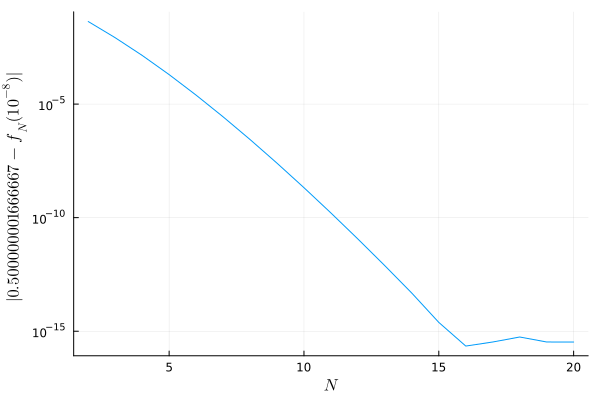

In [6]:
#plot the difference between the estimates and f(small_val)
N_range = 2:20
plot(N_range, abs.(f_at_small_val .- f_N.(small_val, N_range)),
        xlabel=L"N",
        ylabel=L"|0.500000001666667-f_N(10^{-8})|",
        yaxis=:log, labels="")